# Data Analysis 1
## In this analysis we will find the number of sales order details for each sales order, only for sales orders with three or more detail lines

First we connect to the cloud database, run an SQL query for the necessary data and store it in a pandas dataframe.
As the only necessary table for this analysis is the ``SalesOrderDetail`` table, this query will be simple.

In [1]:
import pandas.io.sql as sqlio
import psycopg2
from config import config

params = config()
conn = psycopg2.connect(**params)
sql = 'select * from \"SalesOrderDetail\";'
df1 = sqlio.read_sql_query(sql, conn)
conn.close()

Let's inspect the dataframe.

In [2]:
from IPython.display import display

display(df1.head(3))

,SalesOrderID,SalesOrderDetailID,CarrierTrackingNumber,OrderQty,ProductID,SpecialOfferID,UnitPrice,UnitPriceDiscount,LineTotal,rowguid,ModifiedDate
0,43659,1,4911-403C-98,1,776,1,2024.994,0.0,2024.994,B207C96D-D9E6-402B-8470-2CC176C42283,2011-05-31
1,43659,2,4911-403C-98,3,777,1,2024.994,0.0,6074.982,7ABB600D-1E77-41BE-9FE5-B9142CFC08FA,2011-05-31
2,43659,3,4911-403C-98,1,778,1,2024.994,0.0,2024.994,475CF8C6-49F6-486E-B0AD-AFC6A50CDD2F,2011-05-31


Next let's create a new dataframe with the number of detail lines for each sales order. As we won't need the other variables anymore, let's drop them and rename the ``SalesOrderDetailID`` column to ``NumDetails``.

In [3]:
df2 = df1.groupby(by = ['SalesOrderID']).count()[['SalesOrderDetailID']].rename(columns = {'SalesOrderDetailID': 'NumDetails'}).reset_index()

This is what our new dataframe looks like.

In [4]:
display(df2.head(3))

,SalesOrderID,NumDetails
0,43659,12
1,43660,2
2,43661,15


Now let's create a third dataframe, one that only shows the number of detail lines for each sales order with three or more detail lines.

In [5]:
df3 = df2.drop(df2[df2['NumDetails'] < 3].index).reset_index(drop = True)

This is our final dataframe.

In [6]:
display(df3)

,SalesOrderID,NumDetails
0,43659,12
1,43661,15
2,43662,22
3,43664,8
4,43665,10
...,...,...
12752,75118,4
12753,75119,3
12754,75120,3
12755,75121,3


The total number of rows in this dataframe is.

In [7]:
print(len(df3))

12757


Let's plot a graph with the number of rows for each case.

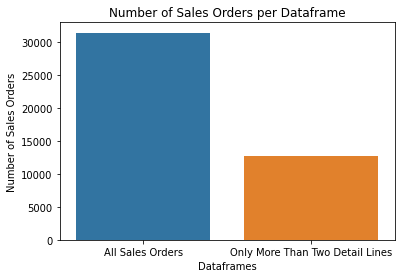

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = {'NumDetails': [len(df2), len(df3)]}
df4 = pd.DataFrame(data = data)

g = sns.barplot(x = df4.index, y = 'NumDetails', data = df4)
g.set(title = 'Number of Sales Orders per Dataframe', xlabel = 'Dataframes', ylabel = 'Number of Sales Orders', xticklabels = ['All Sales Orders', 'Only More Than Two Detail Lines'])
plt.show()

As we can see, less than half of the sales orders have three or more detail lines associated with them:

In [9]:
percentage = round(len(df3)/len(df2), 3) * 100

print(percentage, '% of all sales orders have three or more detail lines')

40.5 % of all sales orders have three or more detail lines


Finally, let's save the resulting dataframe to a ``.csv`` file.

In [10]:
df3.to_csv('results/analysis1.csv')